In [1]:
import pymongo

In [2]:
client=pymongo.MongoClient(host="127.0.0.1",port=27017)

In [14]:
date=input('請輸入日期(年月日)')
dbname='testDB{}'.format(date)
db=client[dbname]
print(db.name)

請輸入日期(年月日)20220111
testDB20220111


In [15]:
db.list_collection_names()

['東方少年',
 '舞伎家的料理人',
 '勇者鬥惡龍 達伊的大冒險',
 '魔法科高中的劣等生 追憶篇',
 '戀上換裝娃娃',
 '銀河騎士傳 織愛之星',
 '瓦尼塔斯的手札',
 '壽司大相撲',
 '食鏽末世錄',
 'Futsal Boys！！！！！',
 '叫我對大哥 (WEB版)',
 '國王排名',
 '最遊記 RELOAD -ZEROIN-',
 '失格紋的最強賢者',
 '假面騎士聖刃 + 機界戰隊全界者 超級英雄戰記',
 '終末的後宮',
 '進擊的巨人 The Final Season',
 '秘密內幕-女警的反擊',
 '艾梅洛閣下 II 世事件簿 -魔眼蒐集列車 Grace note- 特別篇',
 '魯邦三世 PART6',
 '超人力霸王特利卡：NEW GENERATION TIGA',
 '現實主義勇者的王國重建記',
 'TRIBE NINE',
 '闇芝居 第十季',
 '幻想三國誌-天元靈心記',
 '明日同學的水手服',
 'animes',
 '半妖的夜叉姬 第二季',
 '鬼滅之刃 遊郭篇',
 '薔薇王的葬列',
 '東京 24 區',
 '擅長捉弄人的高木同學 第三季',
 'BanG Dream！Episode of Roselia I：約定',
 '轉生成女性向遊戲只有毀滅 END 的壞人大小姐 X',
 '佐佐木與宮野',
 '少女前線',
 '薄櫻鬼 新OVA',
 '怪人開發部的黑井津小姐']

In [5]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [16]:
l=[]
ll=[]
lll=[]
for d in list(db['animes'].find({}, {"_id":0,"動畫名稱":1, "評分":1,'總觀看人數':1})):
    l.append(d['動畫名稱'])
    ll.append(d['評分'])
    lll.append(d['總觀看人數'])
ln=[]
for i in lll:
    if i[-1:]=='萬':#若觀看次數破萬
        ln.append(int(float(i[:-1].replace(',','').strip())*10000))
    else:
        try:
            ln.append(int(i[:-1]))
        except:
            ln.append(0)

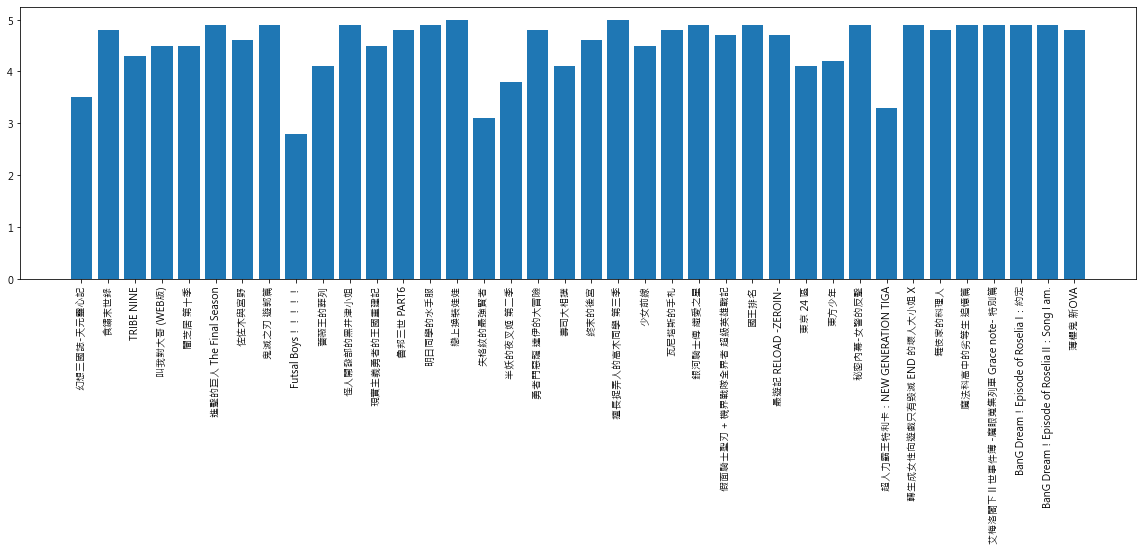

In [17]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(l,ll)
plt.show()

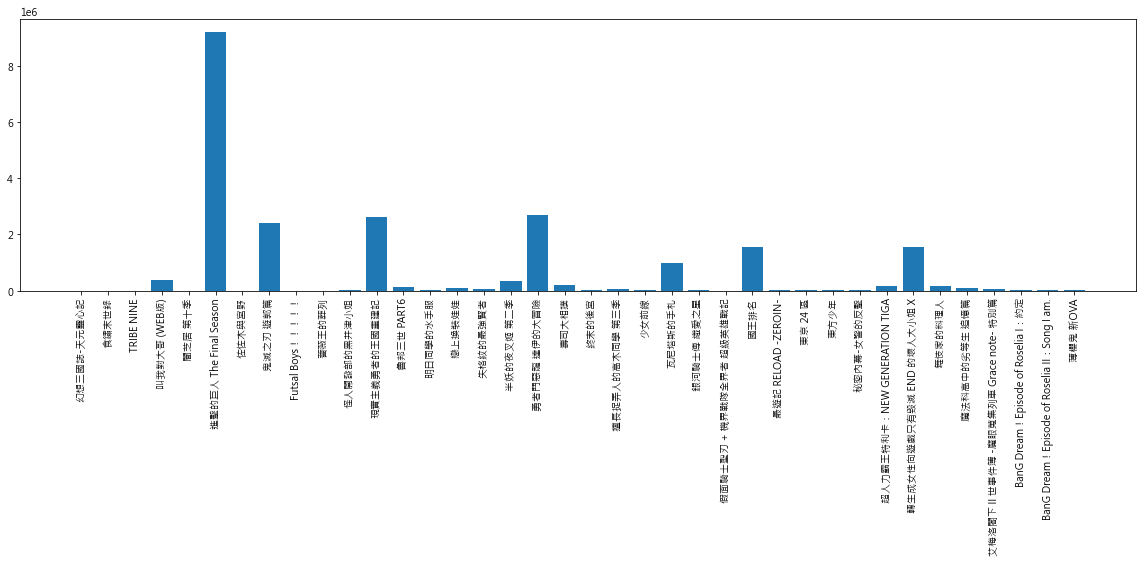

In [18]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(l,ln)
plt.show()

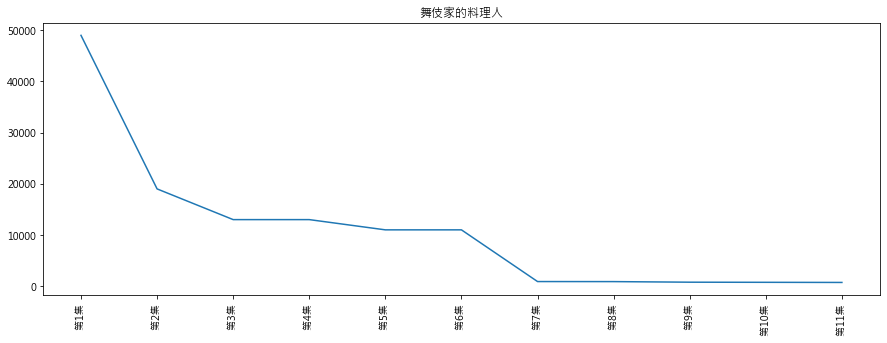

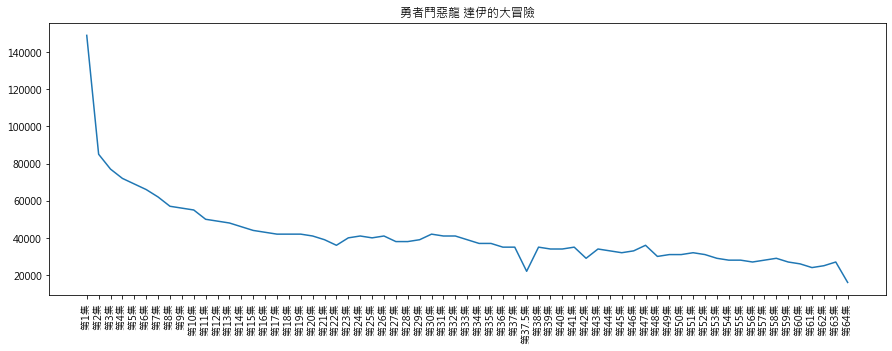

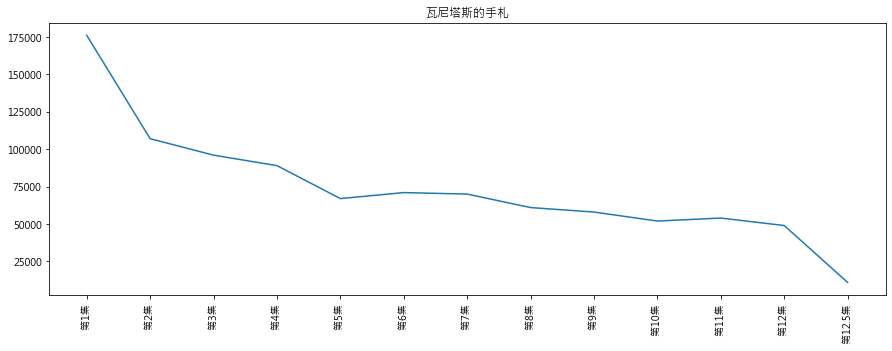

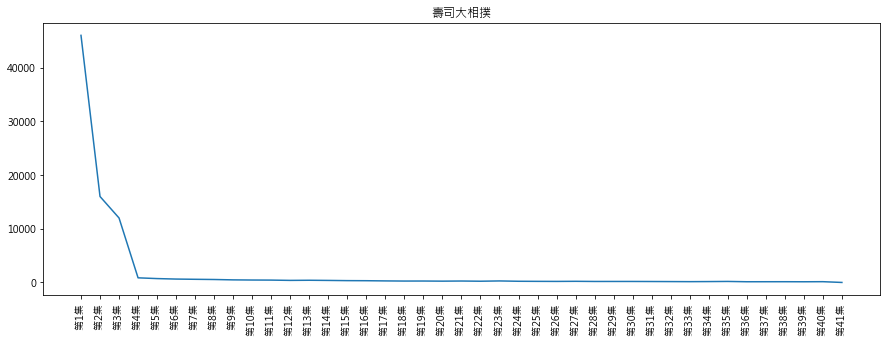

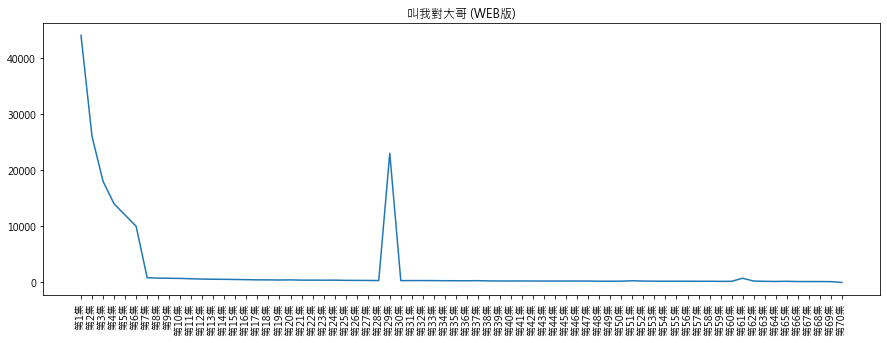

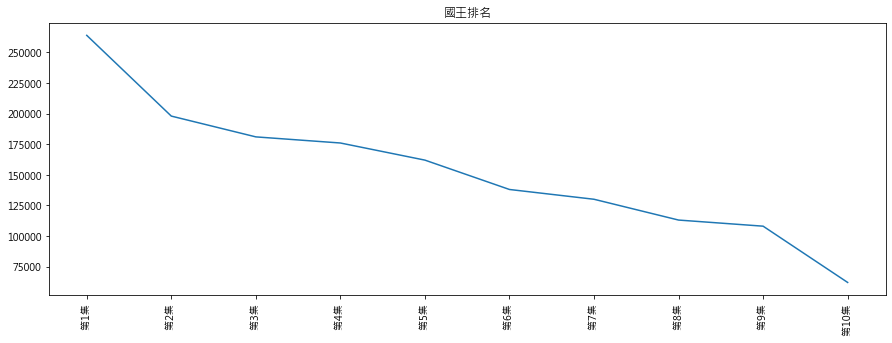

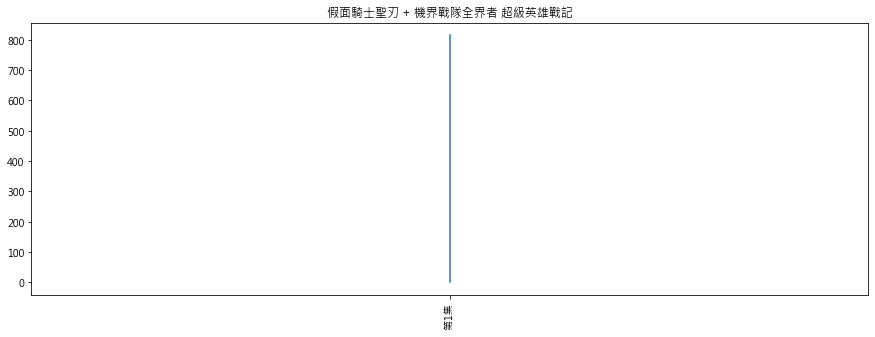

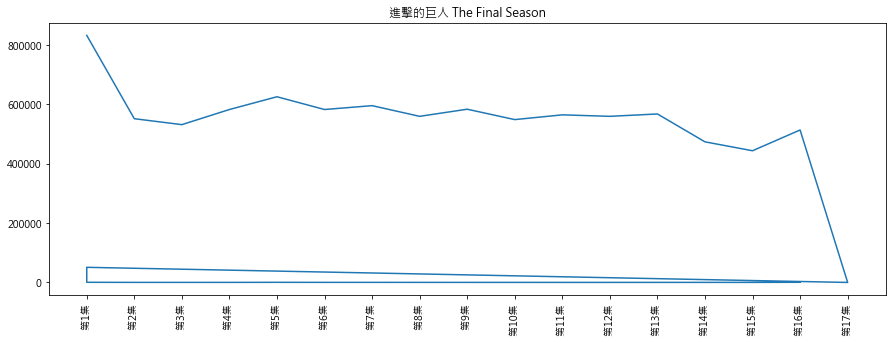

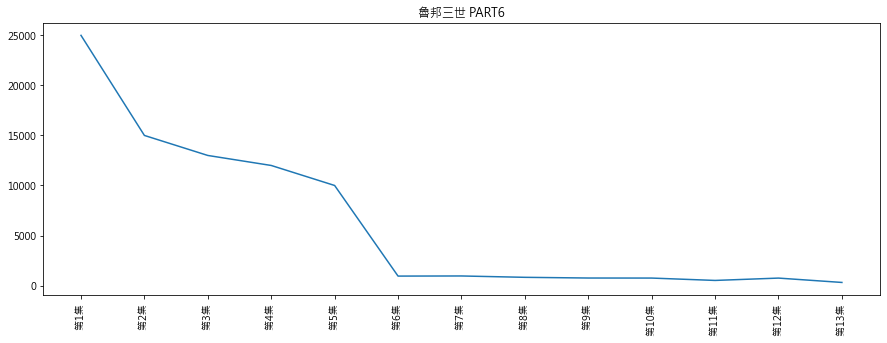

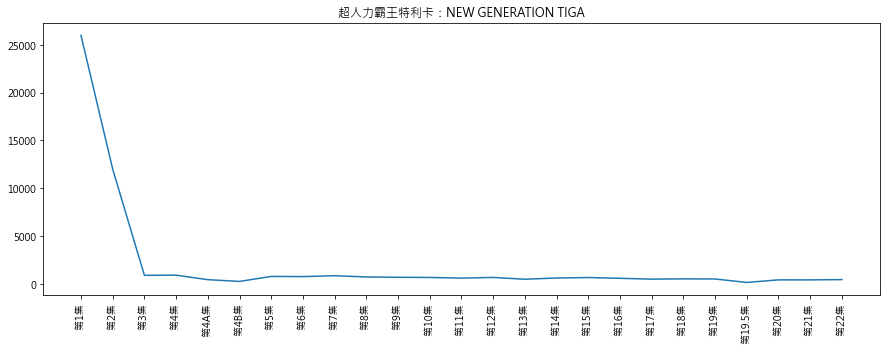

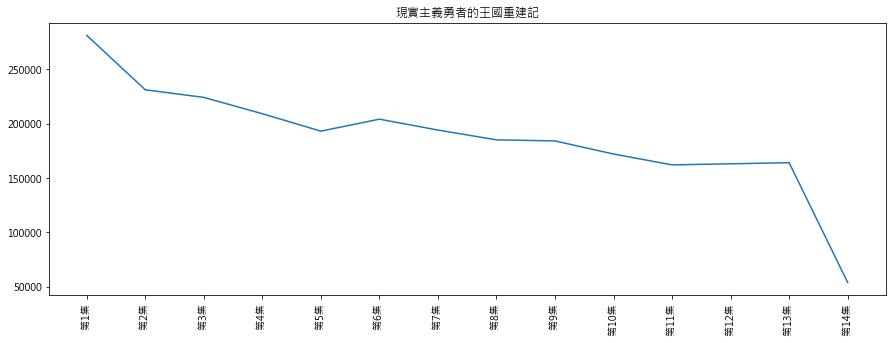

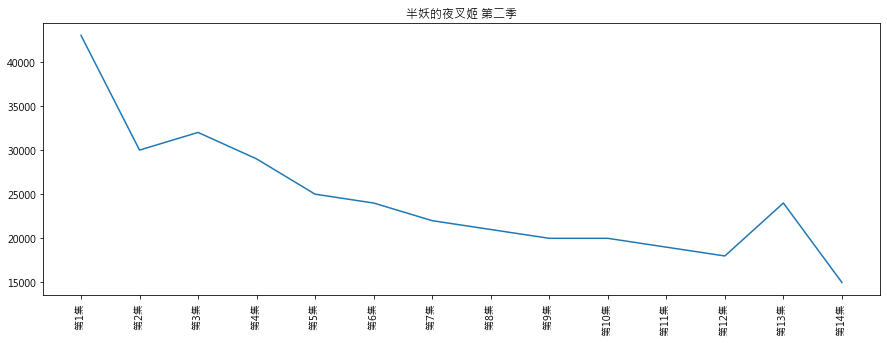

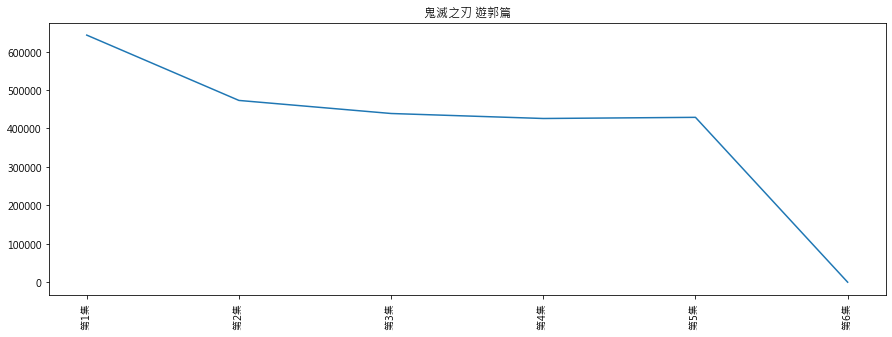

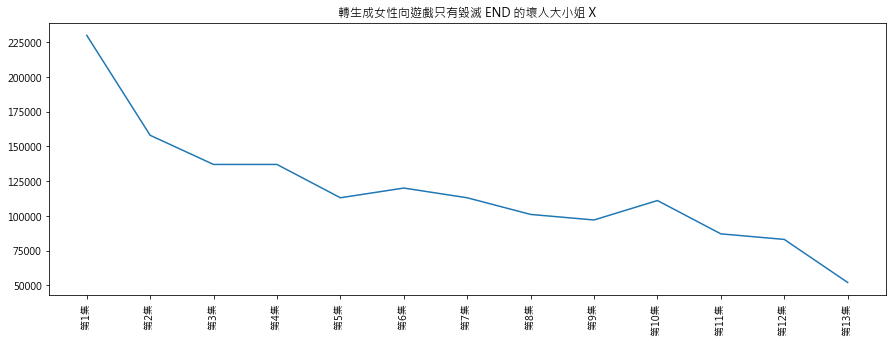

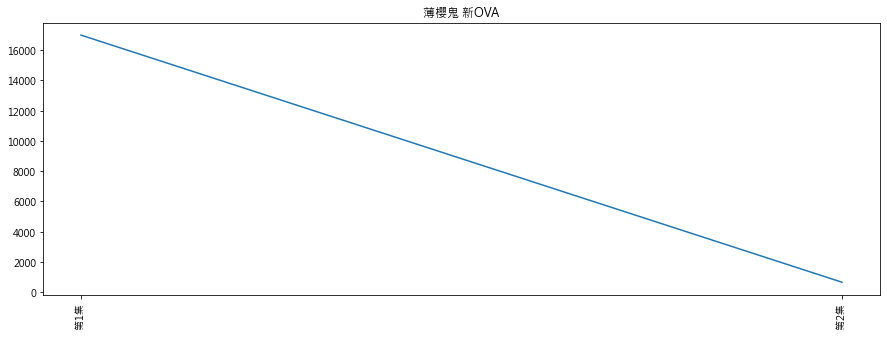

In [19]:
for pl in db.list_collection_names():
    e=[]#集數
    v=[]#觀看次數
    t=True
    for d in list(db[pl].find({}, {"_id":0,"集數":1, '觀看次數':1})):
        try:#因為有animes
            e.append(d["集數"])
            v.append(d["觀看次數"])
        except:
            continue
    vn=[]#將觀看次數轉為數字
    for i in v:
        if i[-1:]=='萬':
            vn.append(int(float(i[:-1])*10000))
        else:
            try:
                vn.append(int(i[:-1]))
            except:
                vn.append(0)
    if len(vn)>1:#若集數大於一集
        plt.figure(figsize=(15,5))
        plt.xticks(rotation=90)
        plt.plot(e,vn)
        plt.title(label=pl)
        plt.show()

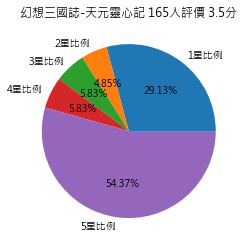

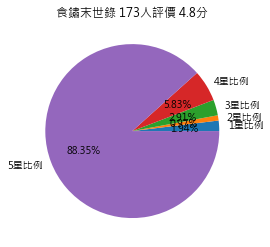

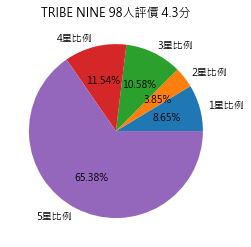

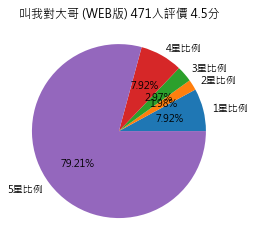

<ipython-input-20-acff2fdce1f2>:20: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



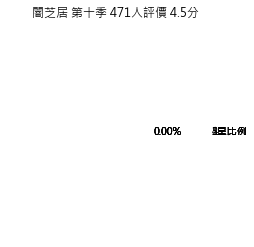

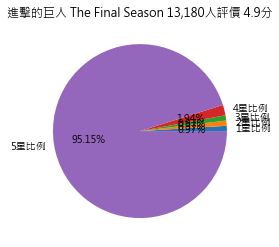

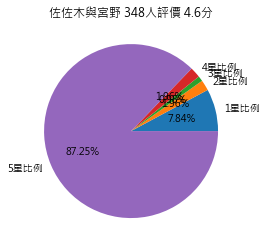

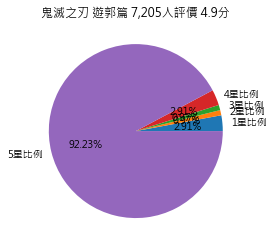

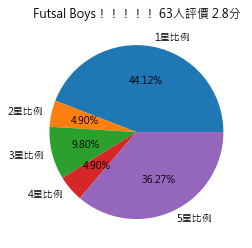

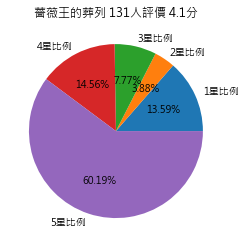

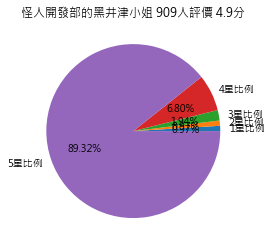

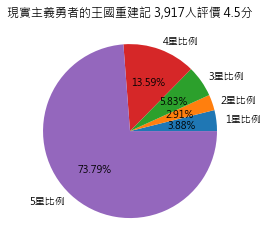

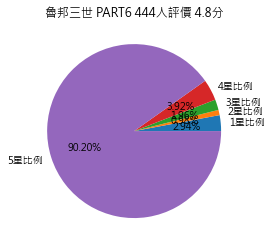

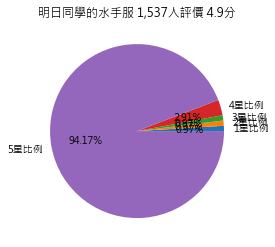

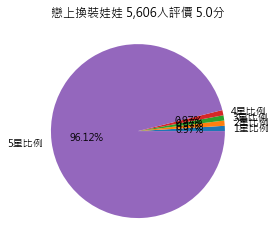

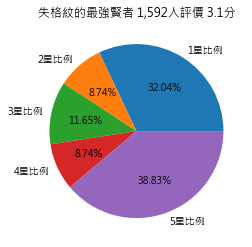

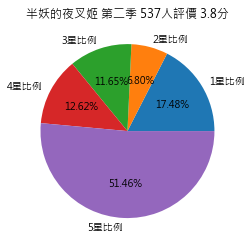

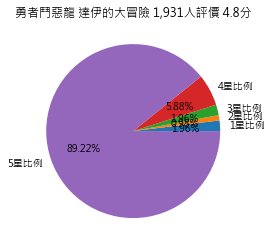

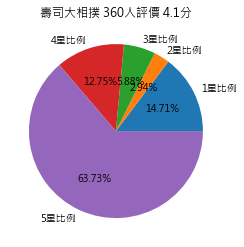

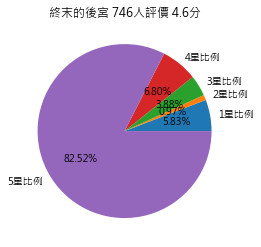

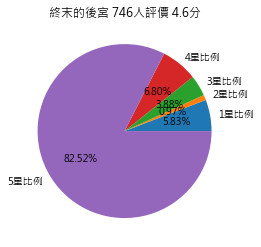

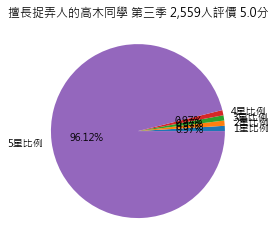

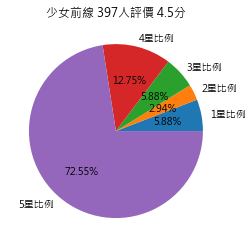

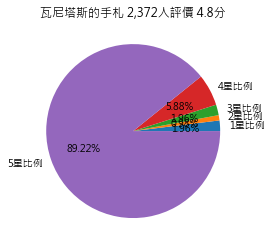

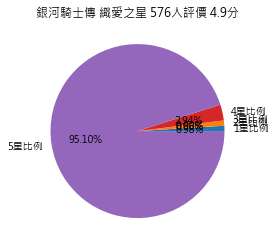

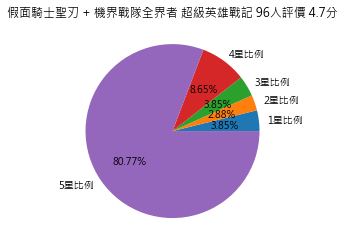

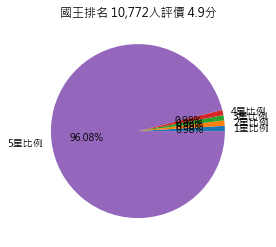

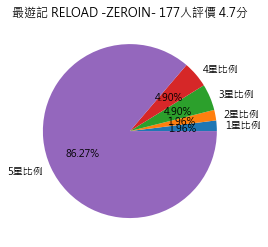

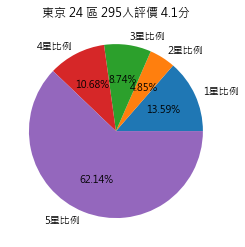

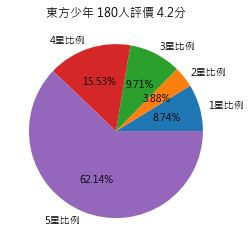

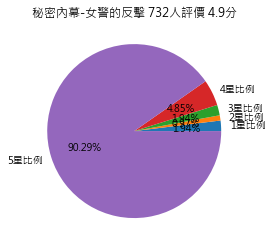

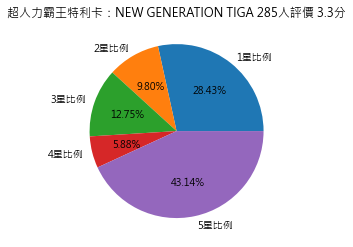

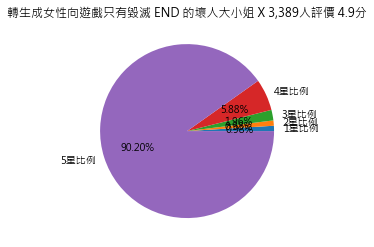

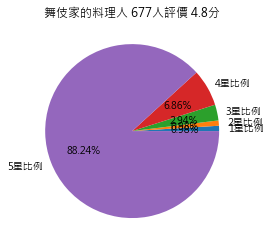

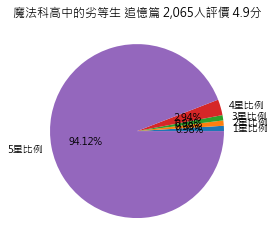

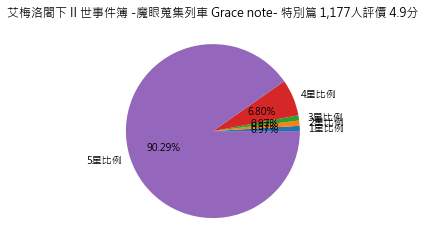

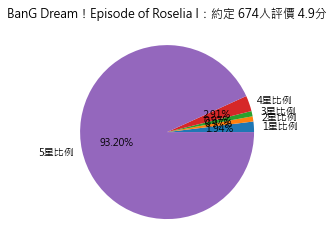

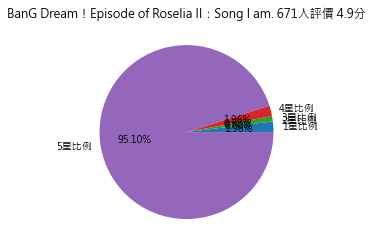

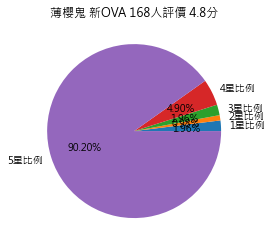

In [20]:
r=["1星比例","2星比例","3星比例","4星比例","5星比例"]
r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
n=[]
p=[]
rr=[]
for d in list(db['animes'].find({}, {"_id":0,"1星比例":1,"2星比例":1,"3星比例":1,"4星比例":1,"5星比例":1,'動畫名稱':1,'評價人數':1, "評分":1})):
    r1.append(d['1星比例'])
    r2.append(d['2星比例'])
    r3.append(d['3星比例'])
    r4.append(d['4星比例'])
    r5.append(d['5星比例'])
    n.append(d['動畫名稱'])
    p.append(d['評價人數'])
    rr.append(d['評分'])
for i in range(len(r1)):
    plt.pie([r1[i],r2[i],r3[i],r4[i],r5[i]], labels=r, autopct='%.2f%%')#製作圓餅圖
    plt.title(n[i]+' '+p[i]+' '+str(rr[i])+'分')
    plt.show()

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
l=[]
ll=[]
for d in list(db['animes'].find({}, {"_id":0,"動畫名稱":1, "作品類型":1})):
    l.append(d['動畫名稱'])
    ll.append(d['作品類型'])

# 計算各個作品類型的數量
category = {}
for i in ll:
    if i not in category:
        category[i] = 1
    else:
        category[i] = category[i] + 1

categoryPD=pd.DataFrame(list(category.items()),columns=["作品類型", "統計"])
fig = px.pie(categoryPD, values='統計', names='作品類型', title='動畫類型比例')
fig.show()

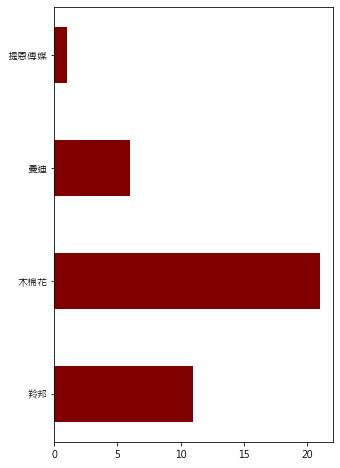

In [22]:
l=[]
for d in list(db['animes'].find({}, {"_id":0,"台灣代理":1})):
    l.append(d['台灣代理'])
    
c = {}
for i in l:
    if i not in c:
        c[i] = 1
    else:
        c[i] = c[i] + 1
l=list(c.keys())        
ll=[]
ll=list(c.values())

plt.figure(figsize=(5,8))
plt.xticks([0,5,10,15,20,25])
plt.barh(l,ll,color='maroon',height=0.5)
plt.show()